In [81]:
print("Feature Selection Techniques")

Feature Selection Techniques


#### Introduction to Feature Selection
- Selecting features from the dataset
- Improve estimator's accuracy
- Boost preformance for high dimensional datsets
- Below we will discuss univariate selection methods
- Also, feature elimination method

In [82]:
from sklearn import feature_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. VarianceThreshold
- Drop the columns whose variance is below configured level
- This method is unsupervised .i.e target not taken into action
- Intution : Columns whose values arn't petty much the same won't have much impact on target

In [83]:
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})

In [84]:
df

,A,B,C
0,m,1,1
1,f,2,2
2,m,3,3
3,m,1,1
4,m,2,2
5,m,1,1
6,m,1,1
7,m,1,1


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [86]:
df['A'] = le.fit_transform(df.A)

In [87]:
df

,A,B,C
0,1,1,1
1,0,2,2
2,1,3,3
3,1,1,1
4,1,2,2
5,1,1,1
6,1,1,1
7,1,1,1


In [88]:
vt = feature_selection.VarianceThreshold(threshold=.2)

In [89]:
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

In [90]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

#### 2. Chi-Square for Non-negative feature & class
- Feature data should be booleans or count
- Supervised technique for feature selection
- Target should be discrete

In [91]:
df = pd.read_csv('tennis.csv.txt')

In [92]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [93]:
df

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [94]:
chi2, pval = feature_selection.chi2(df.drop('play',axis=1),df.play)

In [95]:
chi2

array([2.02814815, 0.02222222, 1.4       , 0.53333333])


- Higher value means more important feature for target
#### 3. ANOVA using f_classif
- For feature variables continues in nature
- And, target variable discrete in nature
- Internally, this method uses ratio of variation within a columns & variation across column

In [96]:
from sklearn.datasets import load_breast_cancer

In [97]:
cancer_data = load_breast_cancer()

In [98]:
X = cancer_data.data
Y = cancer_data.target

In [99]:
chi2, pval = feature_selection.f_classif(X,Y)

In [100]:
np.round(chi2)

array([647., 118., 697., 573.,  84., 313., 534., 862.,  70.,   0., 269.,
         0., 254., 244.,   3.,  53.,  39., 113.,   0.,   3., 861., 150.,
       898., 662., 122., 304., 437., 964., 119.,  66.])

- Each value represents importance of a feature
#### 4. Univariate Regression Test using f_regression
- Linear model for testing the individual effect of each of many regressors.
- Correlation between each value & target is calculated
- F-test captures linear dependency

In [101]:
from sklearn.datasets import fetch_california_housing

In [102]:
house_data = fetch_california_housing()

In [103]:
X,Y = house_data.data, house_data.target

In [104]:
F, pval = feature_selection.f_regression(X,Y)

In [105]:
F

array([1.85565716e+04, 2.32841479e+02, 4.87757462e+02, 4.51085756e+01,
       1.25474103e+01, 1.16353421e+01, 4.38005453e+02, 4.36989761e+01])

- Columns with top F values are the selected features
#### 5. F score verses Mutual Information

In [106]:
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

In [107]:
feature_selection.f_regression(X,y)

(array([187.42118421,  52.52357392,   0.47268298]),
 array([3.19286906e-39, 8.50243215e-13, 4.91915197e-01]))

In [108]:
plt.scatter(X[:,0],y,s=10)

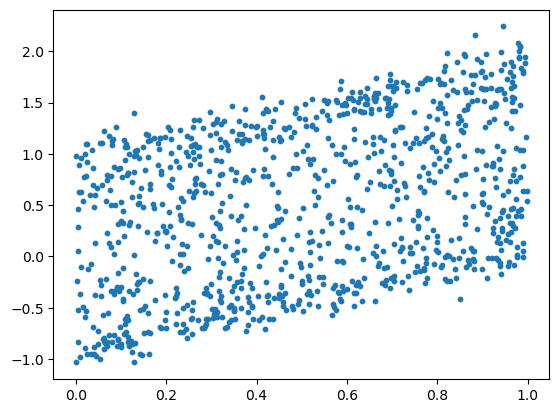

In [109]:
plt.show()

In [110]:
plt.scatter(X[:,1],y,s=10)

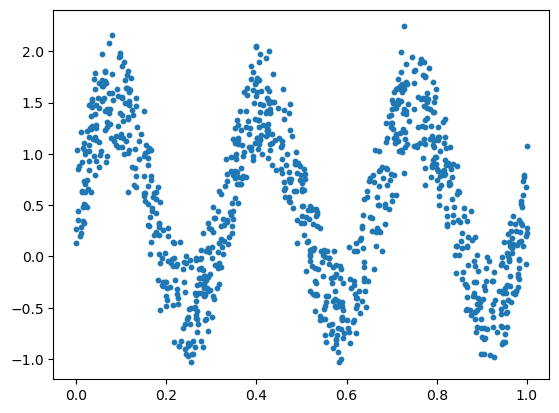

In [111]:
plt.show()

#### 6. Mutual Information for regression using mutual_info_regression
- Returns dependency in the scale of 0 & 1 among feature & target
- Captures any kind of dependency even if non-linear
- Target is continues in nature

In [112]:
feature_selection.mutual_info_regression(X,y)

array([0.31431334, 0.86235026, 0.        ])

#### 7. Mutual Information for classification using mutual_info_classification
- Returns dependency in the scale of 0 & 1 among feature & target
- Captures any kind of dependency even if non-linear
- Target is discrete in nature

In [113]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

In [114]:
cat_cols = list(adult_data.select_dtypes('object').columns)

In [115]:
cat_cols.remove('Salary')

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
for col in cat_cols:
    le = LabelEncoder()
    adult_data[col]  = le.fit_transform(adult_data[col])

In [118]:
#feature_selection.mutual_info_classif(adult_data, adult_data.Salary)

from sklearn.feature_selection import mutual_info_classif

# Assuming 'adult_data' is your DataFrame
# Step 1: Separate features and target
X = adult_data.drop(columns=['Salary'])
y = adult_data['Salary']

# Step 2: Encode target column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Encode features (One-Hot Encoding)
X_encoded = pd.get_dummies(X)

# Step 4: Calculate mutual information scores
mi_scores = mutual_info_classif(X_encoded, y_encoded)

# Step 5: Display feature importance
feature_scores = pd.Series(mi_scores, index=X_encoded.columns)
print(feature_scores.sort_values(ascending=False))


marital-status    0.112288
relationship      0.110219
capital-gain      0.085603
education         0.072701
occupation        0.065751
education-num     0.064033
age               0.063580
hours-per-week    0.038345
capital-loss      0.033543
fnlwgt            0.032382
sex               0.029320
workclass         0.018211
native-country    0.014228
race              0.009130
dtype: float64


In [119]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')


#### 8. SelectKBest
- SelectKBest returns K important features based on above techniques
- Based on configuration, it can use mutual_information or ANOVA or regression based techniques

In [120]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [121]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.f_classif)

In [122]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [123]:
selector.scores_

array([1.88670731e+03, 8.69361605e+01, 2.91559359e+00, 2.06129509e+02,
       4.12009578e+03, 1.34685178e+03, 1.86500322e+02, 2.18764583e+03,
       1.68934788e+02, 1.59310791e+03, 1.70915006e+03, 7.54830452e+02,
       1.81338628e+03, 8.17155711e+00])

In [124]:
data[0]

array([  39,   13,    4,    1,    1, 2174,   40], dtype=int64)

In [125]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.mutual_info_classif)

In [126]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [127]:
selector.scores_

array([0.07147296, 0.01569743, 0.03278414, 0.0639516 , 0.06384592,
       0.11132103, 0.06517786, 0.11252332, 0.01152571, 0.02784815,
       0.08624283, 0.03116002, 0.04483658, 0.00917329])

In [128]:
data[0]

array([  39,    9,   13,    4,    1,    1, 2174], dtype=int64)

#### 9. SelectPercentile
- Selecting top features whose importances are in configured parameter
- Default is top 10 percentile

In [129]:
selector = feature_selection.SelectPercentile(percentile=20, score_func=feature_selection.mutual_info_classif)

In [130]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [131]:
data[:5]

array([[   4,    1, 2174],
       [   2,    0,    0],
       [   0,    1,    0],
       [   2,    0,    0],
       [   2,    5,    0]], dtype=int64)

#### 10. SelectFromModel
- Selecting important features from model weights
- The estimator should support 'feature_importances'

In [132]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [133]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
clf = LinearRegression()
sfm = feature_selection.SelectFromModel(clf, threshold=0.25)

In [136]:
#sfm.fit_transform(boston.data, boston.target).shape
#sfm.fit_transform(housing.data, housing.target).shape

In [137]:
housing.data.shape

(1460, 80)

#### 12. Recursive Feature Elimination
- Uses an external estimator to calculate weights of features
- First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.
- Then, the least important features are pruned from current set of features.
- That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [138]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_regression(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")

#selector = RFE(estimator, 5, step=1)

# Correctly initialize RFE with keyword arguments
selector = RFE(estimator=estimator, n_features_to_select=5, step=1)

data = selector.fit_transform(X, y)

In [139]:
X.shape

(50, 10)

In [140]:
data.shape

(50, 5)

In [141]:
selector.ranking_

array([1, 1, 4, 3, 1, 6, 1, 2, 5, 1])